In [1]:
import tensorflow as tf
tf.__version__

/home/dhruva/miniconda2/envs/tf1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dhruva/miniconda2/envs/tf1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dhruva/miniconda2/envs/tf1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dhruva/miniconda2/envs/tf1/lib/python3.6/site-

'1.4.0'

In [2]:
from tensorflow.examples.tutorials.mnist import input_data


mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)  # y labels are oh-encoded

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
n_train = mnist.train.num_examples  # 55,000
n_validation = mnist.validation.num_examples  # 5000
n_test = mnist.test.num_examples  # 10,000

In [4]:
n_input = 784  # input layer (28x28 pixels)
n_hidden1 = 512  # 1st hidden layer
n_hidden2 = 256  # 2nd hidden layer
n_hidden3 = 128  # 3rd hidden layer
n_output = 10  # output layer (0-9 digits)

In [82]:
learning_rate = 1e-4
n_iterations = 1000-200
batch_size = 128
dropout = 0.5

In [83]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
keep_prob = tf.placeholder(tf.float32)

In [84]:
weights = {
    'w1': tf.Variable(tf.truncated_normal([n_input, n_hidden1], stddev=0.1)),
    'w2': tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2], stddev=0.1)),
    'w3': tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3], stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal([n_hidden3, n_output], stddev=0.1)),
}

In [85]:
biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden1])),
    'b2': tf.Variable(tf.constant(0.1, shape=[n_hidden2])),
    'b3': tf.Variable(tf.constant(0.1, shape=[n_hidden3])),
    'out': tf.Variable(tf.constant(0.1, shape=[n_output]))
}

In [86]:
layer_1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
layer_drop = tf.nn.dropout(layer_3, keep_prob)
output_layer = tf.matmul(layer_3, weights['out']) + biases['out']

In [87]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(
        labels=Y, logits=output_layer
        ))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [88]:
correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [89]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [90]:
for i in range(n_iterations):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={
        X: batch_x, Y: batch_y, keep_prob: dropout
        })

    # print loss and accuracy (per minibatch)
    if i % 100 == 0:
        minibatch_loss, minibatch_accuracy = sess.run(
            [cross_entropy, accuracy],
            feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0}
            )
        print(
            "Iteration",
            str(i),
            "\t| Loss =",
            str(minibatch_loss),
            "\t| Accuracy =",
            str(minibatch_accuracy)
            )

Iteration 0 	| Loss = 4.138093 	| Accuracy = 0.1015625
Iteration 100 	| Loss = 0.45394814 	| Accuracy = 0.84375
Iteration 200 	| Loss = 0.42369372 	| Accuracy = 0.8671875
Iteration 300 	| Loss = 0.4697949 	| Accuracy = 0.859375
Iteration 400 	| Loss = 0.23802654 	| Accuracy = 0.8984375
Iteration 500 	| Loss = 0.16429527 	| Accuracy = 0.953125
Iteration 600 	| Loss = 0.31819648 	| Accuracy = 0.8984375
Iteration 700 	| Loss = 0.4384219 	| Accuracy = 0.859375


In [91]:
test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1.0})
print("\nAccuracy on test set:", test_accuracy)


Accuracy on test set: 0.9147


## downloading a test image
` If you are on a local machine and you would like to use your own hand-drawn number, you can use a graphics editor to create your own 28x28 pixel image of a digit. `

In [16]:
!curl -O https://raw.githubusercontent.com/do-community/tensorflow-digit-recognition/master/test_img.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   393  100   393    0     0    806      0 --:--:-- --:--:-- --:--:--   805


In [18]:
import numpy as np
from PIL import Image

In [92]:
img = np.invert(Image.open("test_img.png").convert('L')).ravel()

In [93]:
prediction = sess.run(tf.argmax(output_layer, 1), feed_dict={X: [img]})
print ("Prediction for test image:", np.squeeze(prediction))

Prediction for test image: 2


In [94]:
import cv2
import matplotlib.pyplot as plt

In [95]:
!ls

5.jpeg	MNIST_data			  new5.png	test.py
6.jpeg	mnist_train_an_test_digits.ipynb  test_img.png


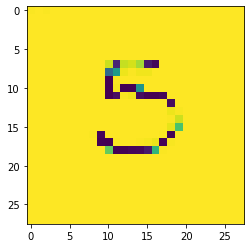

In [132]:
cv_img = cv2.imread("5.jpeg")
cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
##>>>>>>
##>>>>>>
cv_img = cv2.resize(cv_img,(28,28))
cv2.imwrite("new5.png",cv_img)
plt.imshow(cv_img)

True

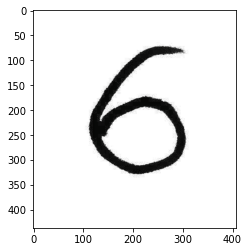

In [136]:
img = cv2.imread('6.jpeg', 1)
plt.imshow(img) 

#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
plt.imshow(lab)

#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
plt.imshow( l)
plt.imshow( a)
plt.imshow( b)

#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
cl = clahe.apply(l)
plt.imshow(cl)

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
plt.imshow( limg)

#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
plt.imshow( final)
cv_img = cv2.resize(final,(28,28))
cv2.imwrite("final.png",cv_img)

In [ ]:
import cv2
import numpy as np

# Open a typical 24 bit color image. For this kind of image there are
# 8 bits (0 to 255) per color channel
img = cv2.imread('mandrill.png')  # mandrill reference image from USC SIPI

s = 128
img = cv2.resize(img, (s,s), 0, 0, cv2.INTER_AREA)

def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):

    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow

        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()

    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)

        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

In [137]:
img = np.invert(Image.open("final.png").convert('L')).ravel()

In [138]:
prediction = sess.run(tf.argmax(output_layer, 1), feed_dict={X: [img]})
print ("Prediction for test image:", np.squeeze(prediction))

Prediction for test image: 6
